In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from random import choice

import collections
from PIL import Image
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [2]:
df = pd.read_csv("ICU_type.csv")

In [3]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,Has_blood_sugar,Has_cholesterol,immunocompromised,ALBUMIN,CALCIUM,CREATININ,GLUCOSE,LACTATE,PCR,DIMER,HEART_RATE,RESPIRATORY_RATE,TEMPERATURE,OXYGEN_SATURATION,Has_covid,ICU_type
0,0,Yes,Male,No,No,No,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.283019,-0.593220,-0.285714,0.736842,Yes,CICU
1,1,Yes,Female,No,No,Yes,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.188679,0.830508,-0.107143,1.000000,No,ICU
2,2,No,Male,No,No,No,0.605263,0.357143,-0.912243,-0.780261,1.0,-0.939887,-0.978029,0.000000,0.000000,0.000000,0.000000,No,ICU
3,11,Yes,Male,No,No,No,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Yes,CICU
4,13,No,Male,No,No,No,0.605263,0.357143,-0.871196,-0.813780,1.0,-0.688847,-0.956289,0.000000,0.000000,0.000000,0.000000,No,ICU


In [4]:
df.isnull().sum()
df.dropna(inplace=True)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
 
ord_enc = OrdinalEncoder()
for i in df.columns:
  if i=='ICU_type':
    break
  if df[i].dtypes=='object':
    df[i] = ord_enc.fit_transform(df[[i]])

df.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,Has_blood_sugar,Has_cholesterol,immunocompromised,ALBUMIN,CALCIUM,CREATININ,GLUCOSE,LACTATE,PCR,DIMER,HEART_RATE,RESPIRATORY_RATE,TEMPERATURE,OXYGEN_SATURATION,Has_covid,ICU_type
0,0,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.283019,-0.593220,-0.285714,0.736842,1.0,CICU
1,1,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.188679,0.830508,-0.107143,1.000000,0.0,ICU
2,2,0.0,1.0,0.0,0.0,0.0,0.605263,0.357143,-0.912243,-0.780261,1.0,-0.939887,-0.978029,0.000000,0.000000,0.000000,0.000000,0.0,ICU
3,11,1.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,CICU
4,13,0.0,1.0,0.0,0.0,0.0,0.605263,0.357143,-0.871196,-0.813780,1.0,-0.688847,-0.956289,0.000000,0.000000,0.000000,0.000000,0.0,ICU


In [6]:
features = df.columns
features

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'Has_blood_sugar',
       'Has_cholesterol', 'immunocompromised ', 'ALBUMIN', 'CALCIUM',
       'CREATININ', 'GLUCOSE', 'LACTATE', 'PCR', 'DIMER', 'HEART_RATE',
       'RESPIRATORY_RATE', 'TEMPERATURE', 'OXYGEN_SATURATION', 'Has_covid',
       'ICU_type'],
      dtype='object')

In [7]:
features = [x for x in features if x != 'ICU_type'] 
features = [x for x in features if x != 'Has_covid']
features

['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'GENDER',
 'Has_blood_sugar',
 'Has_cholesterol',
 'immunocompromised ',
 'ALBUMIN',
 'CALCIUM',
 'CREATININ',
 'GLUCOSE',
 'LACTATE',
 'PCR',
 'DIMER',
 'HEART_RATE',
 'RESPIRATORY_RATE',
 'TEMPERATURE',
 'OXYGEN_SATURATION']

In [8]:
train, test = train_test_split(df, test_size = 0.25, random_state = 0)
len_data=len(df)
len_train=len(train)
len_test=len(test)
print(len_data)
print(len_train)
print(len_test)

195
146
49


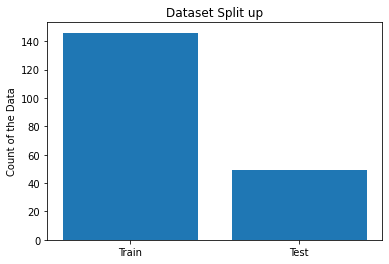

In [9]:
objects=('Train','Test')
y_pos=np.arange(len(objects))
count=[len_train,len_test]
plt.bar(y_pos, count)
plt.xticks(y_pos, objects) 
plt.ylabel('Count of the Data')
plt.title('Dataset Split up')
plt.show()

In [10]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [11]:
x_train = train[features]
y_train = train["ICU_type"]

x_test = test[features]
y_test = test["ICU_type"]

In [12]:
dt = dt.fit(x_train, y_train)

In [13]:
y_pred = dt.predict(x_test)
print("y_pred for Desicion Tree\n",y_pred)

y_pred for Desicion Tree
 ['CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'CICU' 'ICU' 'CICU' 'CICU' 'CICU'
 'CICU' 'ICU' 'CICU' 'ICU' 'ICU' 'ICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU'
 'ICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'ICU' 'CICU' 'CICU' 'CICU'
 'CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'CICU' 'ICU' 'CICU' 'CICU' 'CICU'
 'CICU' 'ICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU']


In [14]:
#Accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 2), "%" )

Accuracy using desicion Tree:  63.27 %


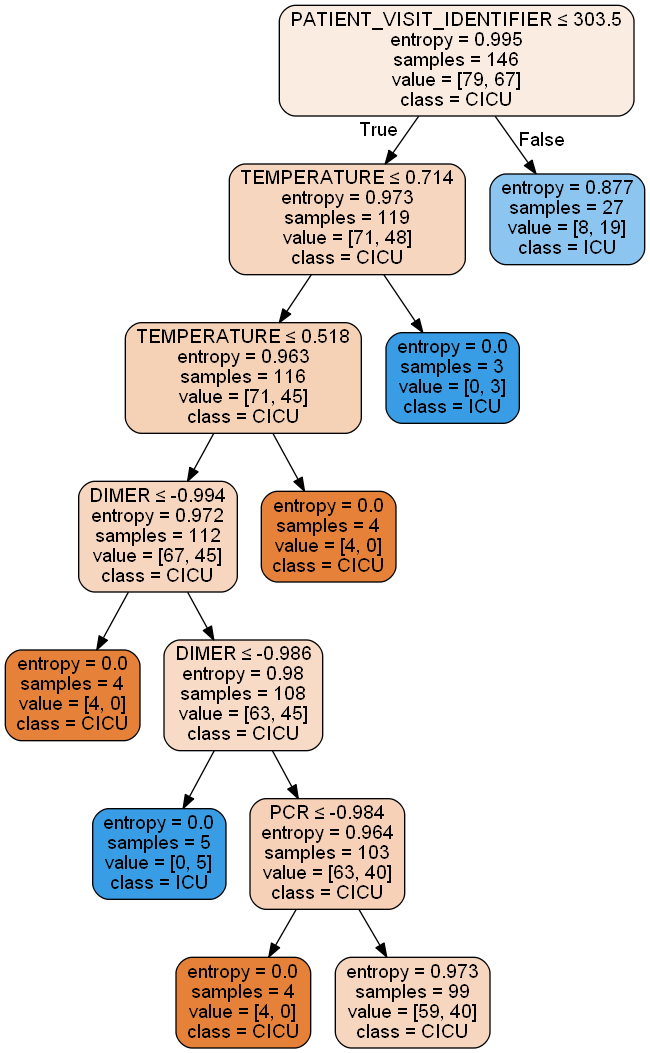

In [15]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=df.ICU_type,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
sv = svm.SVC(kernel='poly', degree=3, C=1.0)

In [17]:
sv = sv.fit(x_train, y_train)

In [18]:
y_pred2 = sv.predict(x_test)
print("y_pred for Support Vector Machine\n",y_pred2)

y_pred for Support Vector Machine
 ['CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'CICU' 'ICU' 'CICU' 'CICU' 'CICU'
 'CICU' 'CICU' 'CICU' 'ICU' 'ICU' 'ICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU'
 'ICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'ICU' 'CICU' 'CICU' 'ICU'
 'CICU' 'CICU' 'CICU' 'CICU' 'ICU' 'CICU' 'ICU' 'CICU' 'CICU' 'CICU'
 'CICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU' 'CICU']


In [19]:
#Accuracy
score2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy using Support Vector Machine: ", round(score2, 2), "%" )

Accuracy using Support Vector Machine:  65.31 %


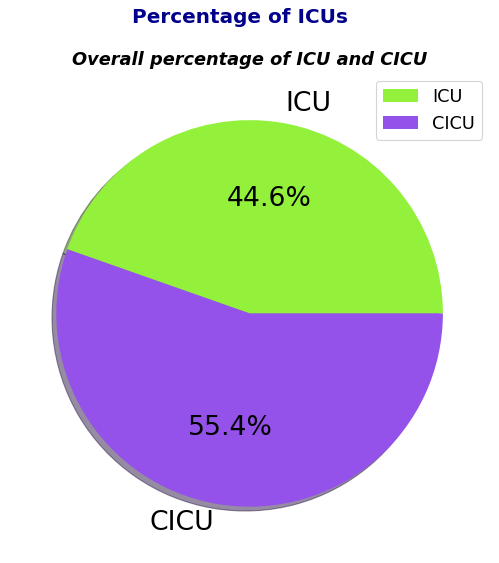

In [20]:
#Plotting
fig = plt.figure (figsize=(10,8), dpi = 80)
fig.suptitle('Percentage of ICUs', fontsize=18, color='darkblue', fontweight='bold')
label = ['ICU','CICU']
c = df[['ICU_type']].query('ICU_type == "ICU"')
d = df[['ICU_type']].query('ICU_type == "CICU"')
l=(c.size/df.size)*100
m=(d.size/df.size)*100

size = [l,m]
colors = ["#93f03b", "#9552ea"] 
plt.pie(size, labels=label, colors=colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 24})
plt.title("Overall percentage of ICU and CICU", fontsize=16, fontweight='bold', style='italic')
plt.legend(loc = "best", fontsize=16)
plt.show()

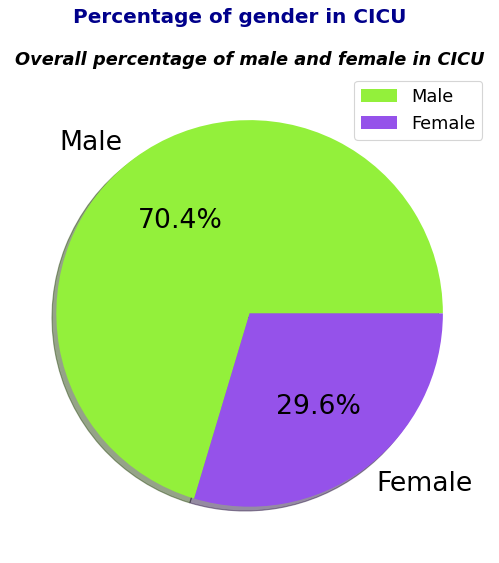

In [21]:
fig = plt.figure (figsize=(10,8), dpi = 80)
fig.suptitle('Percentage of gender in CICU', fontsize=18, color='darkblue', fontweight='bold')
label = ['Male','Female']
c = df[['ICU_type', 'GENDER']].query('ICU_type == "CICU" & GENDER == 1')
d = df[['ICU_type', 'GENDER']].query('ICU_type == "CICU" & GENDER == 0')
l=(c.size/df.size)*100
m=(d.size/df.size)*100

size = [l,m]
colors = ["#93f03b", "#9552ea"] 
pie = plt.pie(size, labels=label, colors=colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 24})
plt.title("Overall percentage of male and female in CICU", fontsize=16, fontweight='bold', style='italic')
plt.legend(loc = "best", fontsize=16)
plt.show(fig)